In [2]:
import numpy as np
import os
from tensorflow import keras
from ncps import wirings
#from ncps.tf import LTC
from ncps.keras import LTC

data_x.shape:  (1, 48, 2)
data_y.shape:  (1, 48, 1)


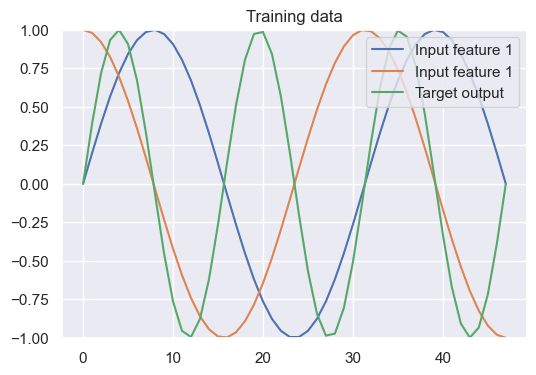

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

N = 48 # Length of the time-series
# Input feature is a sine and a cosine wave
data_x = np.stack(
    [np.sin(np.linspace(0, 3 * np.pi, N)), np.cos(np.linspace(0, 3 * np.pi, N))], axis=1
)
data_x = np.expand_dims(data_x, axis=0).astype(np.float32)  # Add batch dimension
# Target output is a sine with double the frequency of the input signal
data_y = np.sin(np.linspace(0, 6 * np.pi, N)).reshape([1, N, 1]).astype(np.float32)
print("data_x.shape: ", str(data_x.shape))
print("data_y.shape: ", str(data_y.shape))

# Let's visualize the training data
sns.set()
plt.figure(figsize=(6, 4))
plt.plot(data_x[0, :, 0], label="Input feature 1")
plt.plot(data_x[0, :, 1], label="Input feature 1")
plt.plot(data_y[0, :, 0], label="Target output")
plt.ylim((-1, 1))
plt.title("Training data")
plt.legend(loc="upper right")
plt.show()

In [5]:
wiring = wirings.AutoNCP(8,1) # 8 neurons in total, 1 output (motor neuron)
model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=(None, 2)),
        # here we could potentially add layers before and after the LTC network
        LTC(wiring, return_sequences=True),
    ]
)
model.compile(
    optimizer=keras.optimizers.Adam(0.01), loss='mean_squared_error'
)

model.summary()

/Users/joe/Dev/EI2425/ProjetoInformatico/MeteoIA24/RicardoCrespo2211047_MiguelMelro2212879-SiteWebMeteoComIA-PrimeiroZip/Network-training/venvteste39/lib/python3.9/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2025-03-26 16:51:42.859002: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-26 16:51:42.859041: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-03-26 16:51:42.859054: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
I0000 00:00:1743007902.859068  307175 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1743007902.859091  307175 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (dev

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ ltc (LTC)                       │ (None, None, 1)        │           350 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 350 (1.37 KB)

 Trainable params: 350 (1.37 KB)

 Non-trainable params: 0 (0.00 B)

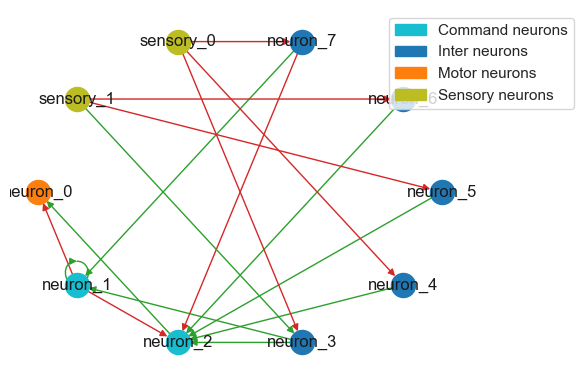

In [7]:
sns.set_style("white")
plt.figure(figsize=(6, 4))
legend_handles = wiring.draw_graph(draw_labels=True, neuron_colors={"command": "tab:cyan"})
plt.legend(handles=legend_handles, loc="upper center", bbox_to_anchor=(1, 1))
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

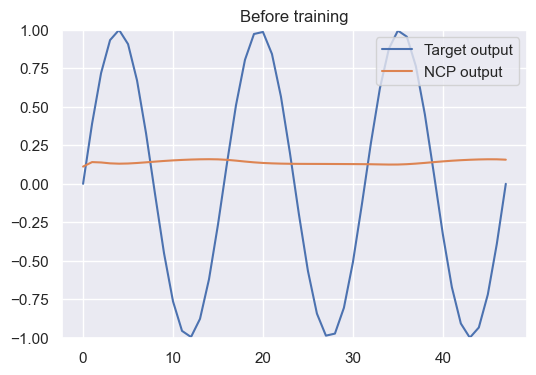

In [8]:
# Let's visualize how LTC initialy performs before the training
sns.set()
prediction = model(data_x).numpy()
plt.figure(figsize=(6, 4))
plt.plot(data_y[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="NCP output")
plt.ylim((-1, 1))
plt.title("Before training")
plt.legend(loc="upper right")
plt.show()

In [9]:
# Train the model for 400 epochs (= training steps)
hist = model.fit(x=data_x, y=data_y, batch_size=1, epochs=400,verbose=1)

Epoch 1/400


2025-03-26 16:54:16.422707: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 0.5174
Epoch 2/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.5075
Epoch 3/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4993
Epoch 4/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4939
Epoch 5/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4917
Epoch 6/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4910
Epoch 7/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4905
Epoch 8/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4898
Epoch 9/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4891
Epoch 10/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4884
Epoch 11/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4879
Epoch 12/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4875
Epoch 13/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4872
Epoch 14/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4867
Epoch 15/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.4857
Epoch 16/400
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.48

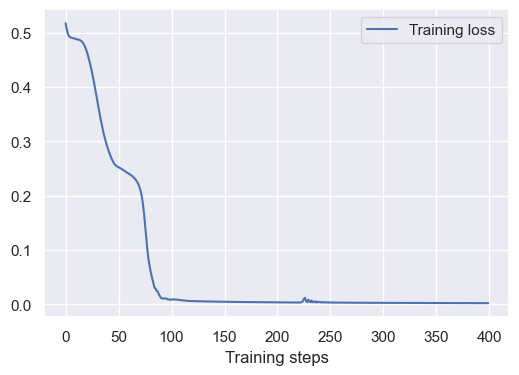

In [10]:
# Let's visualize the training loss
sns.set()
plt.figure(figsize=(6, 4))
plt.plot(hist.history["loss"], label="Training loss")
plt.legend(loc="upper right")
plt.xlabel("Training steps")
plt.show()

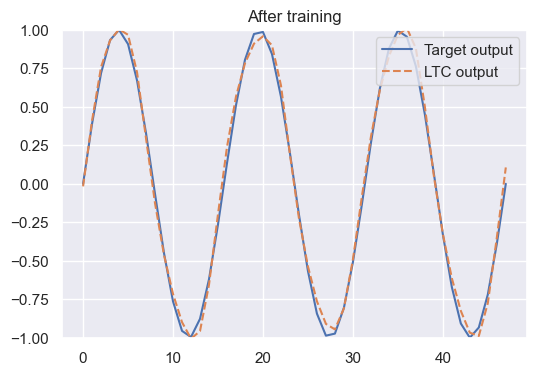

In [11]:
# How does the trained model now fit to the sinusoidal function?
prediction = model(data_x).numpy()
plt.figure(figsize=(6, 4))
plt.plot(data_y[0, :, 0], label="Target output")
plt.plot(prediction[0, :, 0], label="LTC output",linestyle="dashed")
plt.ylim((-1, 1))
plt.legend(loc="upper right")
plt.title("After training")
plt.show()